# Lab1 - Scikit-learn
Author: *BHAVYAI GUPTA*

## 1. Overview

At the end, you are asked to answer the following questions in **Section 5.1 Questions** in the notebook:

1. For each task (classification and regression), which model performs best on the validation data using all features?
2. For each task (classification and regression), which model performs best on the validation data using two principal components?
3. In each task (classification and regression), for each model, how do full feature and two principal component model scores compare on the validation data?
4. Do any of the models underfit or overfit? Provide examples.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Function definitions

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def get_classifier_accuracy(model, X, y):
    '''Calculate train and validation accuracy of classifier (model)
        
        Splits feature matrix X and target vector y 
        with sklearn train_test_split() and random_state=956.
        
        model (sklearn classifier): Classifier to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: training accuracy, validation accuracy
    '''
    
    # split the data into training set and validation set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=956)
    
    # fit the model using training data
    model.fit(X_train, y_train)

    # predict the data on training set
    y_train_predicted = model.predict(X_train)

    # get the training accuracy
    acc_train = accuracy_score(y_train, y_train_predicted)

    # predict the data on validation set
    y_test_predicted = model.predict(X_test)
    
    # get the validation accuracy
    acc_test = accuracy_score(y_test, y_test_predicted)

    return (acc_train, acc_test)

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def get_regressor_mse(model, X, y):
    '''Calculate train and validation mean-squared error (mse) of regressor (model)
        
        Splits feature matrix X and target vector y 
        with sklearn train_test_split() and random_state=956.
        
        model (sklearn regressor): Regressor to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: training mse, validation mse
    '''
    
    # split the data into training set and validation set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=956)
    
    # fit the model using training data
    model.fit(X_train, y_train)

    # predict the data on training set
    y_train_predicted = model.predict(X_train)

    # get the training mean squared error
    mse_training = mean_squared_error(y_train, y_train_predicted)

    # predict the data on validation set
    y_test_predicted = model.predict(X_test)

    # get the validation mean squared error
    mse_validation = mean_squared_error(y_test, y_test_predicted)

    return (mse_training, mse_validation)

In [4]:
from sklearn.decomposition import PCA

def get_n_principal_components(X, n=2):
    '''Extracts n principal componets from feature matrix X using sklearn PCA.
        X (pandas.DataFrame): A feature matrix
        n (int): number of principal components
        
        returns: feature matrix with n columns as numpy.array
    '''
    
    # instantiate the model with hyperparameter
    model = PCA(n_components=n)
    
    # fit the model
    model.fit(X)

    # transform the Feature Matrix
    X_nD = model.transform(X)
    
    return X_nD

## 3. Classification

Using yellowbrick spam - classification  
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

The goal is to compare `LogisticRegression(max_iter=2000)` and `RandomForestClassifier(random_state=88)` classification performance on a validation set with full features and first two principal components.

### 3.1 Load data

Load the spam data set into feature matrix `X` and target vector `y`.

Call `get_n_principal_components()` to obtain feature matrix `X_2D` containing the first two principal components.

Print dimensions and type of `X`, `y`, and `X_2D`.


In [5]:
from yellowbrick.datasets.loaders import load_spam

# loading spam dataset into feature matrix X and target vector y
X, y = load_spam()

# PCA dimensionality reduction on X
X_2D = get_n_principal_components(X, 2)

print("Dimension of X    = {0}\nDimension of y    = {1}\nDimension of X_2D = {2}".format(X.shape, y.shape, X_2D.shape))

Dimension of X    = (4600, 57)
Dimension of y    = (4600,)
Dimension of X_2D = (4600, 2)


### 3.2 Train and evaluate models

1. Import `LogisticRegression` and `RandomForestClassifier` from sklearn
2. Instantiate models `LogisticRegression(max_iter=2000)` and `RandomForestClassifier(random_state=88)` in a list.
3. create a for loop iterating the models list:
    - Call `get_classifier_accuracy()` using all features, i.e. `X`.
    - Call `get_classifier_accuracy()` using PCA features, i.e. `X_2D`.
    - Print training and validation accuracy for both. Limit output to **3 decimal places**.

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# create the list of models
model_list = [LogisticRegression(max_iter=2000), RandomForestClassifier(random_state=88)]

# loop over the model_list to get accuracy
for model in model_list:
    print("{} model".format(model.__class__.__name__))
    
    # calculate the accuracy using all features
    acc_train_all, acc_test_all = get_classifier_accuracy(model, X, y)
    print("  - Using all features")
    print("    1. Training accuracy = {0:.3f}".format(acc_train_all))
    print("    2. Validation accuracy = {0:.3f}\n".format(acc_test_all))


    # calculate the accuracy using PCA features
    acc_train_pca, acc_test_pca = get_classifier_accuracy(model, X_2D, y)
    print("  - Using PCA features")
    print("    1. Training accuracy = {0:.3f}".format(acc_train_pca))
    print("    2. Validation accuracy = {0:.3f}\n".format(acc_test_pca))

LogisticRegression model
  - Using all features
    1. Training accuracy = 0.934
    2. Validation accuracy = 0.917

  - Using PCA features
    1. Training accuracy = 0.729
    2. Validation accuracy = 0.725

RandomForestClassifier model
  - Using all features
    1. Training accuracy = 0.999
    2. Validation accuracy = 0.944

  - Using PCA features
    1. Training accuracy = 0.999
    2. Validation accuracy = 0.771



### 3.3 Plot PCA feautures
Use a Seaborn `scatterplot` to visulaize the two PCA components using the lables in `y` as `hue`.

Label x- and y-axis and add a title.

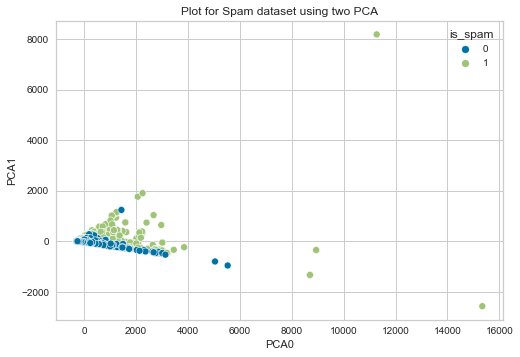

In [7]:
# plot the X_2D
sns.scatterplot(x=X_2D[:,0], y=X_2D[:,1], hue=y)

# add the title
plt.title("Plot for Spam dataset using two PCA")

# label the axes
plt.xlabel('PCA0');
plt.ylabel('PCA1');

## 4. Regression

Using yellowbrick energy - regression  
https://www.scikit-yb.org/en/latest/api/datasets/energy.html

The goal is to compare `LinearRegression()` and `RandomForestRegressor(random_state=88)` regression performance on a validation set with full features and first two principal components.

### 4.1 Load data

Load the energy data set into feature matrix `X` and target vector `y`.

Call `get_n_principal_components()` to obtain feature matrix `X_2D` containing the first two principal components.

Print dimensions and type of `X`, `y`, and `X_2D`.

In [8]:
from yellowbrick.datasets import load_energy

# loading energy dataset into feature matrix X and target vector y
X, y = load_energy()

# PCA dimensionality reduction on X
X_2D = get_n_principal_components(X, 2)

print("Dimension of X    = {0}\nDimension of y    = {1}\nDimension of X_2D = {2}".format(X.shape, y.shape, X_2D.shape))

Dimension of X    = (768, 8)
Dimension of y    = (768,)
Dimension of X_2D = (768, 2)


### 4.2 Train and evaluate models

1. Import `LinearRegression` and `RandomForestRegressor` from sklearn
2. Instantiate models `LinearRegression()` and `RandomForestRegressor(random_state=88)` in a list.
3. create a for loop iterating the models list:
    - Call `get_regressor_mse()` using all features, i.e. `X`.
    - Call `get_regressor_mse()` using PCA features, i.e. `X_2D`.
    - Print training and validation accuracy for both. Limit output to **1 decimal place**.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# create the list of models
model_list = [LinearRegression(), RandomForestRegressor(random_state=88)]

# loop over the model_list to get accuracy
for model in model_list:
    print("{} model".format(model.__class__.__name__))

    # calculate the mse using all features
    mse_train_all, mse_test_all = get_regressor_mse(model, X, y)
    print("  - Using all features")
    print("    1. Training mean squared error = {0:.1f}".format(mse_train_all))
    print("    2. Validation mean squared error = {0:.1f}\n".format(mse_test_all))

    # calculate the accuracy using PCA features
    mse_train_pca, mse_test_pca = get_regressor_mse(model, X_2D, y)
    print("  - Using PCA features")
    print("    1. Training mean squared error = {0:.1f}".format(mse_train_pca))
    print("    2. Validation mean squared error = {0:.1f}\n".format(mse_test_pca))

LinearRegression model
  - Using all features
    1. Training mean squared error = 8.0
    2. Validation mean squared error = 10.3

  - Using PCA features
    1. Training mean squared error = 22.2
    2. Validation mean squared error = 19.6

RandomForestRegressor model
  - Using all features
    1. Training mean squared error = 0.0
    2. Validation mean squared error = 0.2

  - Using PCA features
    1. Training mean squared error = 9.6
    2. Validation mean squared error = 8.6



### 4.3 Plot PCA feautures
Use a Seaborn `scatterplot` to visulaize the two PCA components using the values in `y` as `hue` and `size`.

Label x- and y-axis and add a title.

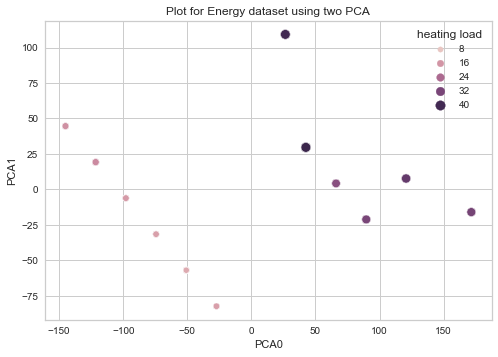

In [10]:
# plot the X_2D
sns.scatterplot(x=X_2D[:,0], y=X_2D[:,1], hue=y, size=y)

# add the title
plt.title("Plot for Energy dataset using two PCA")

# label the axes
plt.xlabel('PCA0');
plt.ylabel('PCA1');

## 5. Observations/Interpretation

### 5.1 Questions
1. For each task (classification and regression), which model performs best on the validation data using all features?

**Classification:**  
*ADD YOUR FINDINGS HERE*

**Regression:**  
*ADD YOUR FINDINGS HERE*


2. For each task (classification and regression), which model performs best on the validation data using two principal components?

**Classification:**  
*ADD YOUR FINDINGS HERE*

**Regression:**  
*ADD YOUR FINDINGS HERE*

3. In each task (classification and regression), for each model, how do full feature and two principal component model scores compare on the validation data?

**Classification:**  
*ADD YOUR FINDINGS HERE*

**Regression:**  
*ADD YOUR FINDINGS HERE*

4. Do any of the models underfit or overfit? Provide examples.
**Underfitting**   
*ADD YOUR FINDINGS HERE*

**Overfitting**   
*ADD YOUR FINDINGS HERE*

### 5.2 Conclusion
Conclude on any one pattern you see emerge in your answers to questions above. Include the data to justify your conclusion.


*ADD YOUR FINDINGS HERE*


## 6. Reflection
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*